# Systems of Ordinary Differencial Equations

## Harmonic Oscilator

$$
\ddot{x} +\frac{c}{m}\dot{x} +\frac{k}{m}x = 0
$$

m := mass

k := sping constant

c := friction coefficient


In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def solve_harmonic(m, k, c = 0, x0=5, v0=0, span=[0,10]):
    
    def harmonic(t, q):
        return [q[1], -k*q[0]/m - c*q[1]/m]
    
    return solve_ivp(harmonic, span, [x0, v0], dense_output=True)


In [3]:
m = 1
k = 1
c = 0
x0 = 2.
v0 = 0.
span = [0,15]

solution = solve_harmonic(m,k,c,x0,v0,span)

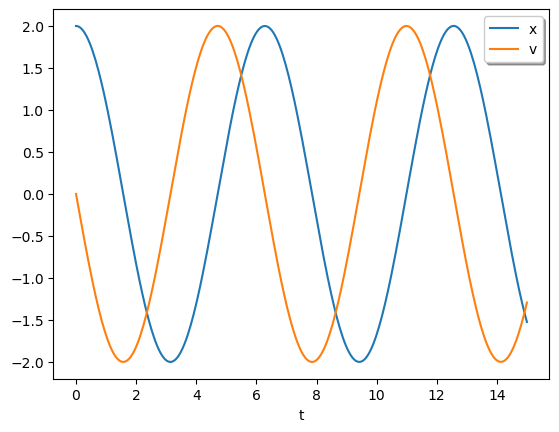

In [4]:
t = np.linspace(0, 15, 300)
z = solution.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'v'], shadow=True)

Text(0.5, 1.0, 'Harmonic Oscilator - Phase Space')

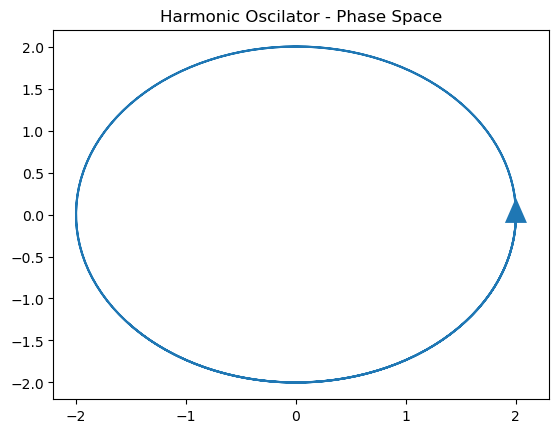

In [5]:
plt.plot(z[0], z[1])
plt.arrow(2, 0, 0, 0.2, shape='full', lw=0, length_includes_head=True, head_width=0.2)
plt.title('Harmonic Oscilator - Phase Space')

In [6]:
c = 0.5
solution = solve_harmonic(m,k,c,x0,v0,span)

Text(0.5, 1.0, 'Damped Harmonic Oscilator')

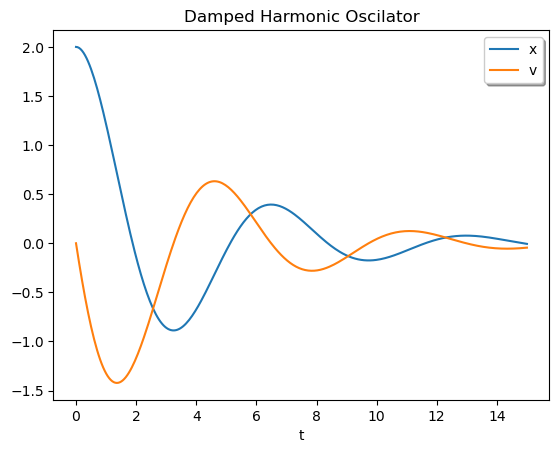

In [7]:
t = np.linspace(0, 15, 300)
z = solution.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'v'], shadow=True)
plt.title('Damped Harmonic Oscilator')

Text(0.5, 1.0, 'Dampled Harmonic Oscilator - Phase Space')

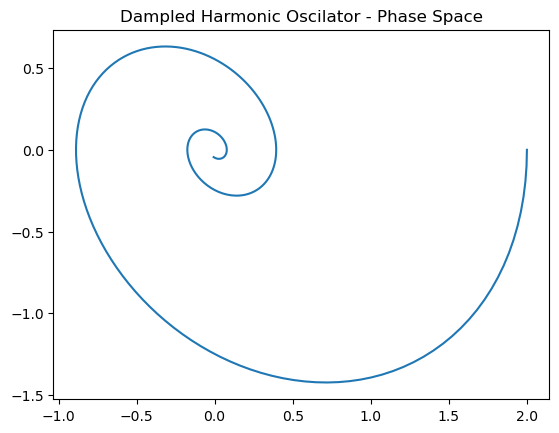

In [8]:
plt.plot(z[0], z[1])
plt.title('Dampled Harmonic Oscilator - Phase Space')

## Projectile Motion

$
m \dot{v_x} = 0\\
m \dot{v_y} = -mgy
$

m := mass

g := Gravitational acceleration near earth


In [9]:
g = 9.81  # Acceleration due to gravity (m/s^2)

In [10]:
def exact_solution(v0, phi):
    """
    :param v0: initial velocity magnitude
    :param phi: initial angle
    :return: 
    """
    impact_time = 2 * v0 * np.sin(phi) / g
    t = np.linspace(0, impact_time, 1000)
    x = v0 * np.cos(phi) * t
    y = v0 * np.sin(phi) * t - (g * t ** 2) / 2
    return x, y

In [11]:
x, y = exact_solution(10, np.pi/6)

Text(0.5, 1.0, 'Projectile with no air resistance')

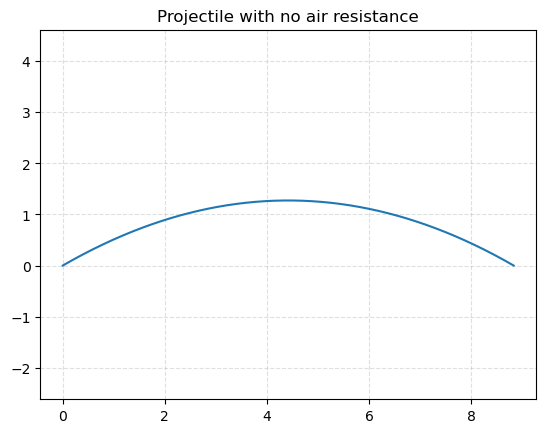

In [12]:
plt.plot(x,y)
plt.grid(alpha=.4, linestyle='--')
plt.axis('equal')
plt.ylim(0, 2)
plt.title('Projectile with no air resistance')

## With air resistance (Newton drag)

$
m \dot{v_x} = -k|v|v_x\\
m \dot{v_y} = -mgy - k|v|v_y
$
where
$ |v| = \sqrt{v_x^2 + v_y^2} $

In [13]:
# Drag calculation
rho_air = 1.29  # Air density (kg/m^3)
m = 0.16  # Mass of projectile (kg)
cD = 0.5  # Drag coefficient (spherical projectile)
r = 0.0366  # Radius of projectile (m)
k = 0.5 * cD * (np.pi * r ** 2) * rho_air / m

In [14]:
from scipy.integrate import odeint

def solve_projectile(init):
    def func(vec, _):
        vx, vy = vec[2], vec[3]
        # time derivative of the whole vector vec
        v = np.sqrt(vx ** 2 + vy ** 2)
        return [vx, vy, -k * v * vx, -g - k * v * vy]

    # impact of the resistance-free projectile motion
    impact_time = 2 * init[3] / g
    solution = odeint(func, init,
                      np.linspace(0, impact_time, 1000))
    return solution

In [15]:
# Launch properties
v0 = 50  # Initial velocity (m/s)
phi = np.pi / 4  # Launch angle (deg.)
initial_conditions = [0, 0, v0 * np.cos(phi), v0 * np.sin(phi)]
solution = solve_projectile(initial_conditions) 
xt, yt = solution[:, 0], solution[:, 1]

In [16]:
def find_last_positive_index(vl):
    for i in range(len(vl)):
        if vl[i + 1] < 0:
            return i
    return -1


In [17]:
index = find_last_positive_index(yt)
yt = yt[0:index]
xt = xt[0:index]

Text(0.5, 1.0, 'Projectile with Newton drag')

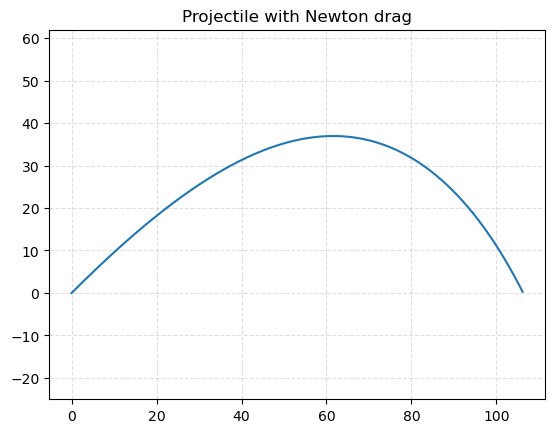

In [18]:
plt.plot(xt,yt)
plt.grid(alpha=.4, linestyle='--')
plt.axis('equal')
plt.title('Projectile with Newton drag')

## Lorentz System
### A comparison of odeint vs solve_ipv

In [19]:
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [1.0, 1.0, 1.0]  # Initial state of the system

In [20]:
t = np.arange(0.0, 40.0, 0.01)
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)

t_span = (0.0, 40.0)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p,  method='LSODA', t_eval=t)

Text(0.5, 0.92, 'solve_ivp')

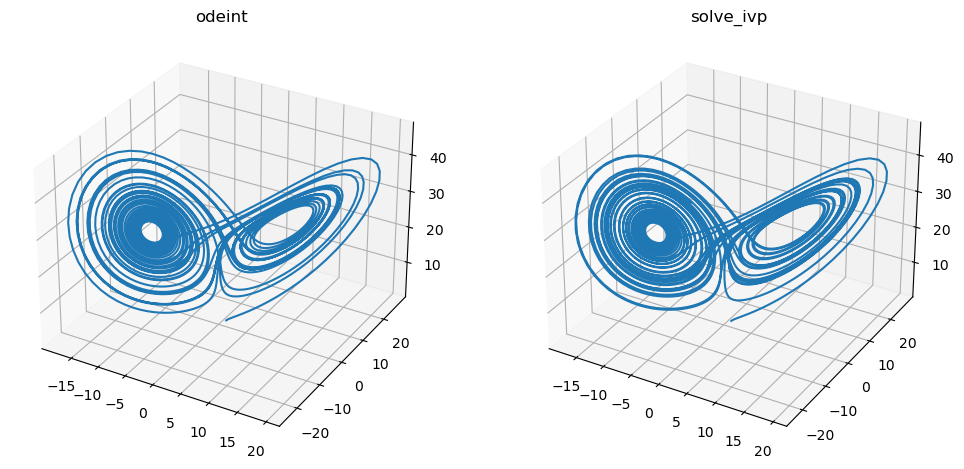

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(121, projection='3d')
plt.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
plt.title("odeint")
plt.subplot(122, projection='3d')

plt.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
plt.title("solve_ivp")

## Non-linear Pendulum

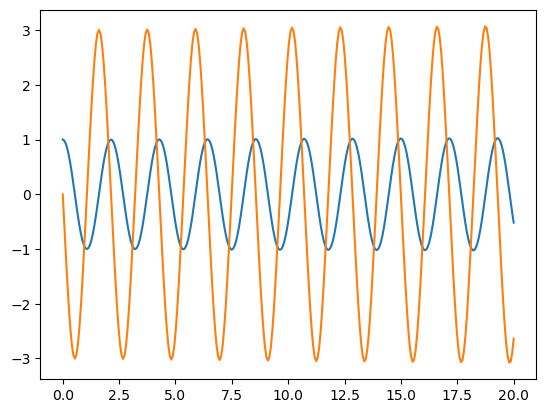

In [22]:
def pendulum(t, state, g, L):
    return [state[1], -g*np.sin(state[0])/L]

g = 9.81
L = 1
t_span = (0.0, 20.0)
t = np.arange(0.0, 20.0, 0.01)
state0 = [1, 0]

   
result = solve_ivp(pendulum, t_span, state0, args=(g, L),  
                    dense_output=True, method='LSODA')

t = np.linspace(0, 20, 300)
z = result.sol(t)

plt.plot(t, z.T)

## Sympy

In [23]:
# Simple Example
import sympy

t, k, T0, Ta = sympy.symbols("t k T0 T_a")
T = sympy.Function("T")

In [24]:
ode = T(t).diff(t) + k*(T(t)- Ta)
sympy.Eq(ode, 0)

Eq(k*(-T_a + T(t)) + Derivative(T(t), t), 0)

In [25]:
ode_sol = sympy.dsolve(ode)
ode_sol

Eq(T(t), C1*exp(-k*t) + T_a)

In [26]:
ics = {T(0): T0}
ics

{T(0): T0}

In [27]:
C_eq = ode_sol.subs(t, 0).subs(ics)
C_eq

Eq(T0, C1 + T_a)

In [28]:
C_sol = sympy.solve(C_eq)
C_sol

[{C1: T0 - T_a}]

In [29]:
ode_sol.subs(C_sol[0])

Eq(T(t), T_a + (T0 - T_a)*exp(-k*t))

### Dumped Harmonic Oscilator

In [30]:
t, omega0, gamma= sympy.symbols("t omega_0, gamma", positive=True)
x = sympy.Function("x")

In [31]:
ode = x(t).diff(t,2) + 2*gamma*omega0*x(t).diff(t)+omega0**2 * x(t)
sympy.Eq(ode, 0)

Eq(2*gamma*omega_0*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [32]:
ode_sol = sympy.dsolve(ode)
ode_sol

Eq(x(t), C1*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))) + C2*exp(-omega_0*t*(gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

In [33]:
from odes import apply_ics

In [34]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics

{x(0): 1, Subs(Derivative(x(t), t), t, 0): 0}

In [35]:
x_t_sol =apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

Eq(x(t), (-gamma/(2*sqrt(gamma - 1)*sqrt(gamma + 1)) + 1/2)*exp(-omega_0*t*(gamma + sqrt(gamma - 1)*sqrt(gamma + 1))) + (gamma/(2*sqrt(gamma - 1)*sqrt(gamma + 1)) + 1/2)*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

In [36]:
# Account for the case gamma = 1

x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

(omega_0*t + 1)*exp(-omega_0*t)

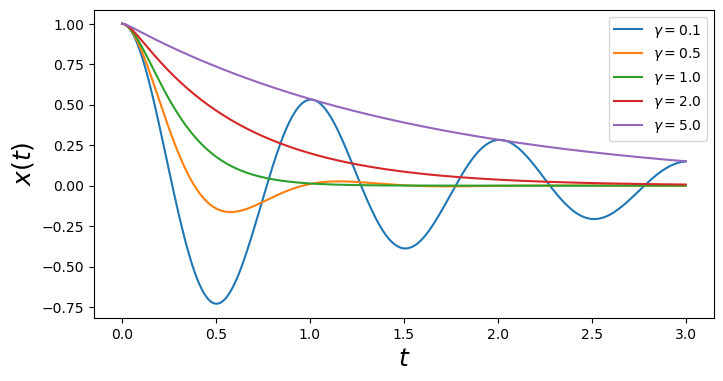

In [44]:
fig, ax = plt.subplots(figsize=(8,4))
tt = np.linspace(0,3,250)
w0 = 2*sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t,x_t_critical.subs({omega0:w0}), "numpy")
    else:
        x_t = sympy.lambdify(t,x_t_sol.rhs.subs({omega0: w0, gamma: g}),"numpy")
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()